In [14]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import os 
import glob
import h5py

In [15]:
Nphi = 320
Nr = 128
Re = '1e10'
Ld = '1e7'
U = 100
exp_name = f'output/Nphi{Nphi}_Nr{Nr}_Re{Re}_Ld{Ld}_U{U}'
exp_name 

'output/Nphi320_Nr128_Re100_Ld1e7_U100'

## Check the scalar

In [12]:
scalars_path = f'./{exp_name}/scalars'
scalars_prefix = os.path.join(scalars_path, 'scalars')
files = sorted(glob.glob(f"{scalars_prefix}_s*.h5"))

for fname in files:
    with h5py.File(fname, 'r') as f:
        print(f["tasks"].keys())

<KeysViewHDF5 []>


In [16]:
snapshots_path = f'./{exp_name}/snapshots'
snapshots_prefix = os.path.join(snapshots_path, 'snapshots')
files = sorted(glob.glob(f"{snapshots_prefix}_s1.h5"))
psi1_list = []
psi2_list = []
q1_list = []
q2_list = []

for fname in files:
    with h5py.File(fname, 'r') as f:
        psi1 = f["tasks/psi1"][:]
        psi2 = f["tasks/psi2"][:]
        q1 = f["tasks/q1"][:]
        q2 = f["tasks/q2"][:] 

        dset = f['tasks']['psi1']
        phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
        r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

        psi1_list.append(np.copy(psi1))
        psi2_list.append(np.copy(psi2))
        q1_list.append(np.copy(q1))
        q2_list.append(np.copy(q2))

psi1 = np.concatenate(psi1_list, axis=0)
psi2 = np.concatenate(psi2_list, axis=0)
q1 = np.concatenate(q1_list, axis=0)
q2 = np.concatenate(q2_list, axis=0)
print(psi1.shape)


(100, 320, 128)


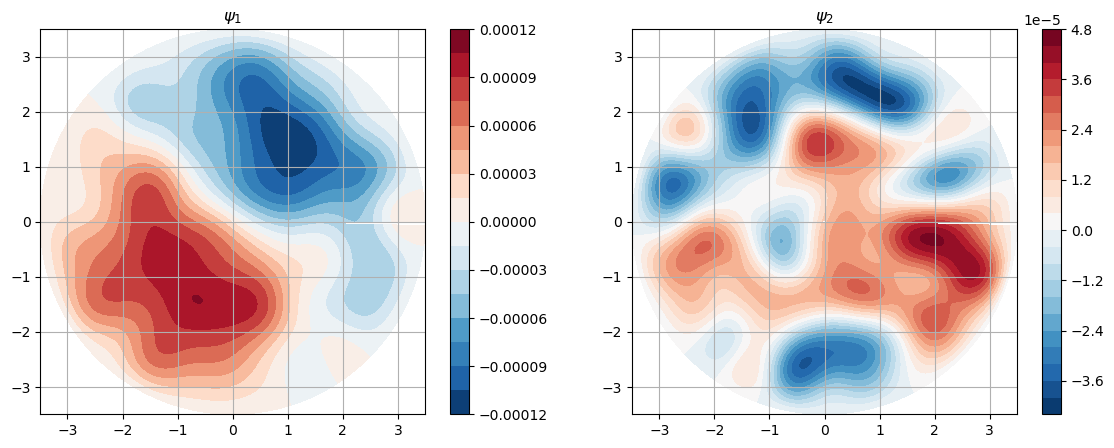

In [17]:
st = -1

prob_class = 'IVP'
r0 = 0
rt = None 

x = r[:,r0:rt] * np.cos(phi)
y = r[:,r0:rt] * np.sin(phi)
q1t = q1[st,:,r0:rt]
q2t = q2[st,:,r0:rt]

fig, ax = plt.subplots(1,2, figsize=(14,5))

im = ax[0].contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax[0].set_aspect('equal')           # force square aspect
ax[0].set_adjustable('box')         # let the box resize
ax[0].set_title(r'$\psi_1$')
ax[0].grid()
plt.colorbar(im)

im = ax[1].contourf(x,y, q2t, levels=21, cmap='RdBu_r')
ax[1].set_aspect('equal')           # force square aspect
ax[1].set_adjustable('box')         # let the box resize
ax[1].set_title(r'$\psi_2$')
ax[1].grid()
plt.colorbar(im)

# Spectram of psi1

In [ ]:
psi1_sel = psi1[::10,:,:]

psi1_coef = np.fft